# DS 5500 Homework 2 - Due Oct. 28

### Overview
#### This homework asks you to visualize data from the Gapminder Foundation (https://www.gapminder.org).
#### Download the full Gapminder dataset from the Open Numbers Github repository:
* https://github.com/open-numbers/ddf–gapminder–systema_globalis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [2]:
gdp               = pd.read_csv("ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
child_mortality   = pd.read_csv("ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
life_expectancy   = pd.read_csv("ddf--datapoints--life_expectancy_years--by--geo--time.csv")
continents        = pd.read_csv("ddf--entities--geo--country.csv")

### Problem 1
#### Confirm your group for the second project component. Check in with me if the group is different from the first project component.
#### Post a public note on Piazza in the project folder with the title “[group] all group members’ last names”. Include in the body of the note all of the group members’ full names.

#### Answer 1: 
Refer to Piazza

### Problem 2
#### Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (distribution of income across countries and continents over time). Include a link to the original.
#### Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

#### Answer 2 : 
Link to Prathwish Shetty's plot:
https://colab.research.google.com/github/prathwishshetty/DS5500-Homework-1/blob/master/ds5500_hw1.ipynb

The plot used to describe across continents is more or less similar the only difference is I have not used regions but all 7 continents seperately. However the plot to show the distribution of income across the countries is interactive and has a map. It is easy to understand and get overview of distribution of income across countries over time. His plot gives a good high-level idea and also lets you hover and see actual values at particular time. However the slopes can be observed in my static visualization which can give comparitive information across countries within a continent.It does effectively answers things that were supposed to be addressed.

### Problem 3
#### Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (relationship between income, life expectancy, and child mortality over time). Include a link to the original.
#### Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it effectively visualize what is being asked? Why or why not?

#### Answer 3 : 
Link to Prathwish Shetty's plot:
https://colab.research.google.com/github/prathwishshetty/DS5500-Homework-1/blob/master/ds5500_hw1.ipynb

The plots used to describe with time as per different regions gives good high level idea about different regions but doesn't account for all the continents. It is more or less similar and does effectively visualize what was asked.


### Problem 4
#### Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)
#### Visualize the model(s) and comment on what they tell you about the relationship between income and life expectancy over time.

#### Answer 4 : 

In [3]:
gdp_le = pd.merge(gdp, life_expectancy, on = ['geo', 'time']) 
gdp_le = pd.merge(gdp_le, continents[['country', 'world_4region']], left_on = 'geo', right_on = 'country')
gdp_le['time'] = gdp_le['time'].astype(str)
gdp_le.head()

,geo,time,gdppercapita_us_inflation_adjusted,life_expectancy_years,country,world_4region
0,abw,2010,24271.94042,75.06,abw,americas
1,afg,2002,364.57057,52.43,afg,asia
2,afg,2003,376.75871,53.03,afg,asia
3,afg,2004,364.09544,53.50,afg,asia
4,afg,2005,389.41636,53.87,afg,asia


#### Using Linear Regression 
* Life Expectancy ~ GDP + time 
* 𝑅² value is low.

In [4]:

model = LinearRegression()
model.fit(gdp_le[['time','gdppercapita_us_inflation_adjusted']],gdp_le[['life_expectancy_years']])
r_sq = model.score(gdp_le[['time','gdppercapita_us_inflation_adjusted']],gdp_le[['life_expectancy_years']])
r_sq

0.4416760350631872

####  Plotting GDP vs Life expectancy we observe logarithmic relationship.

Text(0.5, 1.0, 'GDP vs Life Expectancy')

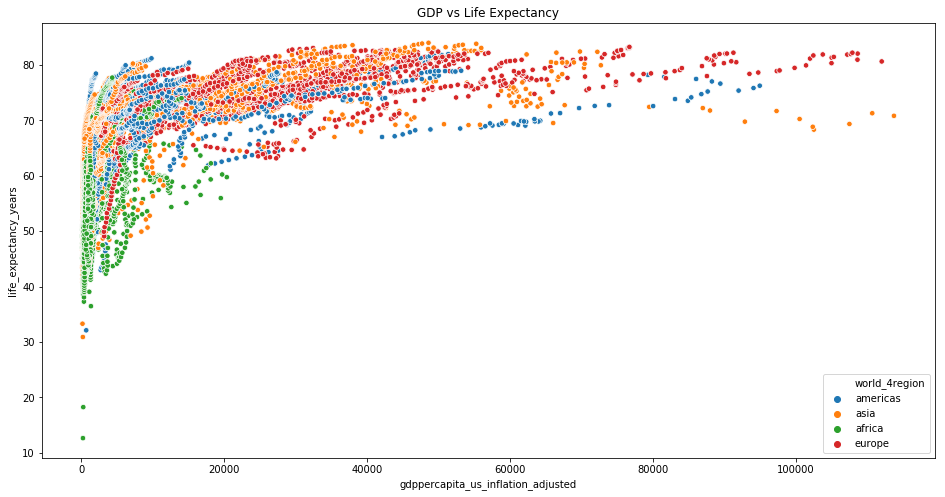

In [5]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(data= gdp_le, x = 'gdppercapita_us_inflation_adjusted', y = 'life_expectancy_years', hue ='world_4region', s = 30)
plt.title('GDP vs Life Expectancy')    

#### On converting GDP to log the relationship is somewhat linear.

Text(0.5, 1.0, 'GDP vs Life Expectancy')

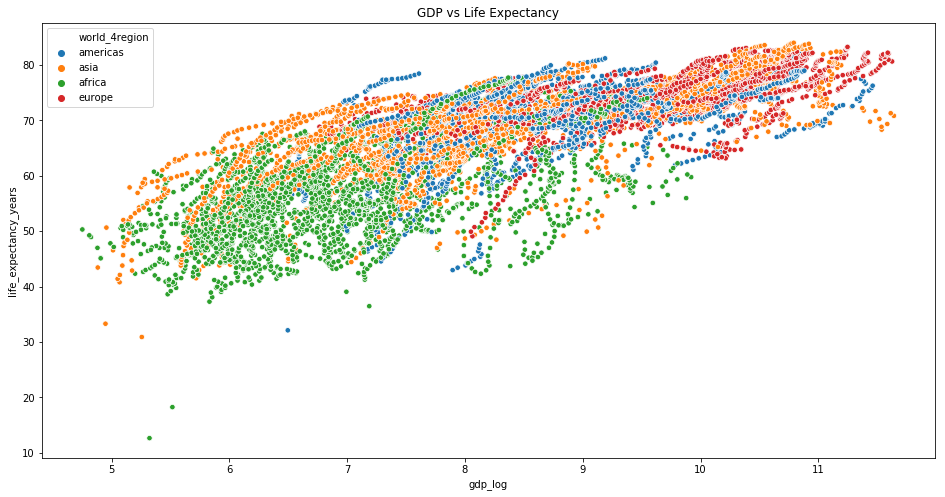

In [6]:
gdp_le['gdp_log'] = [np.log(x) for x in gdp_le.gdppercapita_us_inflation_adjusted]

fig,ax = plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(data= gdp_le, x = 'gdp_log', y = 'life_expectancy_years', hue ='world_4region', s = 30)
plt.title('GDP vs Life Expectancy')  

#### Using Linear Regression
* Life Expectancy ~ log(GDP)
* 𝑅² value improves

In [7]:
from sklearn.linear_model import LinearRegression
model_log = LinearRegression()
model_log.fit(gdp_le[['gdp_log']],gdp_le[['life_expectancy_years']])
r_sq = model_log.score(gdp_le[['gdp_log']],gdp_le[['life_expectancy_years']])
r_sq

0.6139686034713563

#### Using Linear Regression
* Life Expectancy ~ log(GDP) + time
* 𝑅² value improves.

In [8]:
from sklearn.linear_model import LinearRegression
model_log = LinearRegression()
model_log.fit(gdp_le[['time','gdp_log']],gdp_le[['life_expectancy_years']])
r_sq = model_log.score(gdp_le[['time','gdp_log']],gdp_le[['life_expectancy_years']])
r_sq

0.7031192644378716

In [9]:
bias = model_log.intercept_
coef = model_log.coef_

In [10]:
pd.DataFrame({'time':coef[0][0],'gdp_log':coef[0][1],'bias':bias},index = ['coefficients'])

,time,gdp_log,bias
coefficients,0.189786,4.787211,-351.277946


#### For the model with best 𝑅² value we can Quantify the relationship between Life expectancy and GDP as:
#### $$ Life \ Expectancy \propto 4.787211*log(GDP)   $$

####  Change in average life expectancy for a continent across time

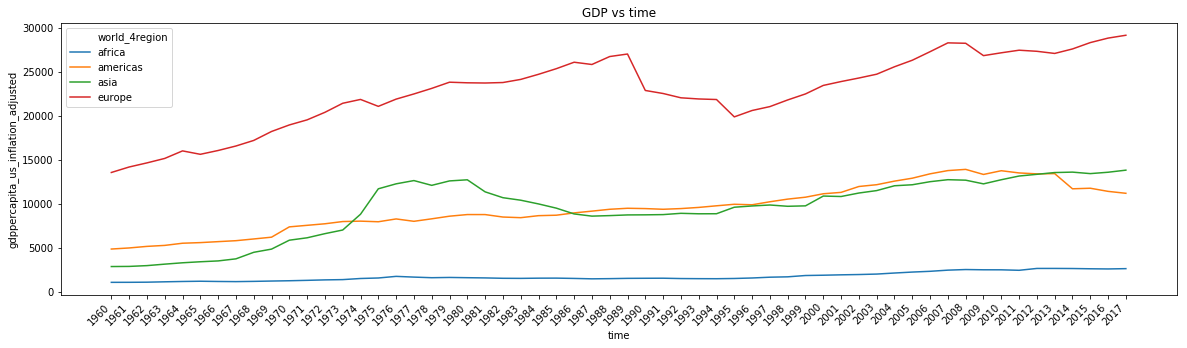

In [35]:
grouped_df = gdp_le.groupby(['world_4region','time']).mean().reset_index()[['world_4region','time','gdppercapita_us_inflation_adjusted','life_expectancy_years']]
plt.figure(figsize=(20,5))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.title("GDP vs time")
sns.lineplot(data = grouped_df, x = 'time', y = 'gdppercapita_us_inflation_adjusted', hue = 'world_4region') 



####  Change in average GDP for a continent across time

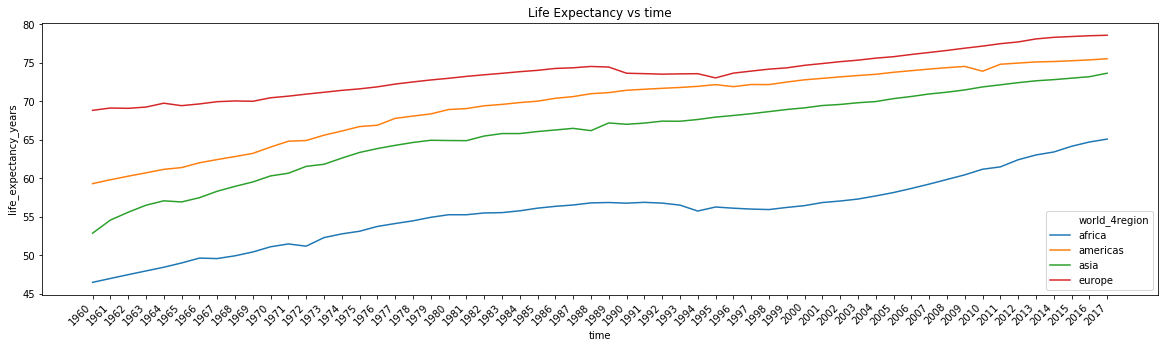

In [36]:
plt.figure(figsize=(20,5))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.title("Life Expectancy vs time")
sns.lineplot(data = grouped_df, x = 'time', y = 'life_expectancy_years', hue = 'world_4region') 



#### Log(Gdp) seems to be linearly related to life expectancy. Hence, used Linear Regression on log(GDP) and Life expectancy the R² value of the model is 0.703 which is good.

#### The assumption of Linear Regression is that all the variables are independent of each other however as the data is time series there is an autocorrelation amongst the time components (i.e. time series is linearly related to a lagged version of itself the previous data can be used to forcast the trend in life expectancy or GDP( per capita income )). Hence the auto

### Problem 5
#### Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)
#### Visualize the model(s) and comment on what they tell you about the relationship between income and child mortality over time.

#### Answer 5 : 

In [15]:
gdp_cm = pd.merge(gdp, child_mortality, on = ['geo', 'time'])\
           .rename(columns = {'child_mortality_0_5_year_olds_dying_per_1000_born':'child_mortality'}) 
gdp_cm = pd.merge(gdp_cm, continents[['country', 'world_4region']], left_on = 'geo', right_on = 'country')
gdp_cm['time'] = gdp_cm['time'].astype(str)
gdp_cm.head()

,geo,time,gdppercapita_us_inflation_adjusted,child_mortality,country,world_4region
0,abw,2010,24271.94042,17.969,abw,americas
1,afg,2002,364.57057,122.200,afg,asia
2,afg,2003,376.75871,118.300,afg,asia
3,afg,2004,364.09544,114.400,afg,asia
4,afg,2005,389.41636,110.300,afg,asia


####  Using Linear Regression
* Child Mortality ~ GDP + time
* Poor 𝑅² value.

In [16]:
model = LinearRegression()
model.fit(gdp_cm[['time','gdppercapita_us_inflation_adjusted']],gdp_cm[['child_mortality']])
r_sq = model.score(gdp_cm[['time','gdppercapita_us_inflation_adjusted']],gdp_cm[['child_mortality']])
r_sq

0.3785423617659289

#### Observing relationship between GDP vs Child Mortality

Text(0.5, 1.0, 'GDP vs Child Mortality')

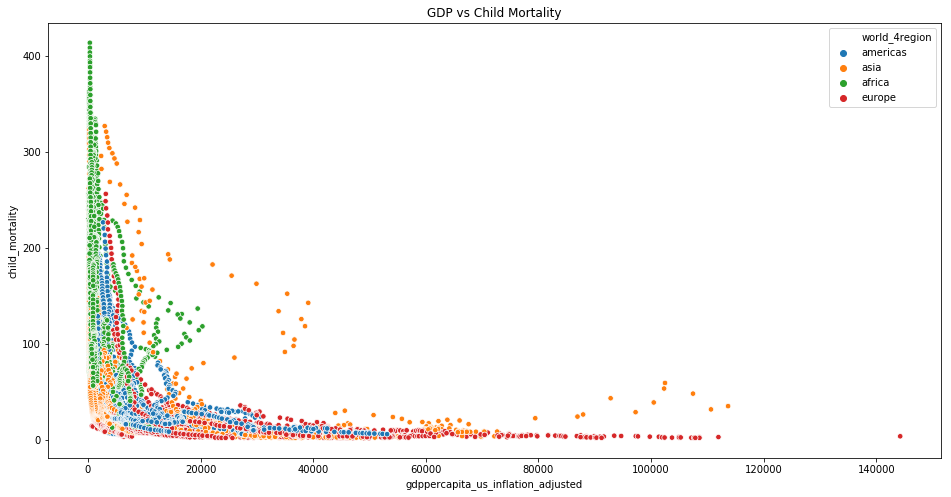

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(data= gdp_cm, x = 'gdppercapita_us_inflation_adjusted', y = 'child_mortality', hue ='world_4region', s = 30)
plt.title('GDP vs Child Mortality') 

* The relationship is non linear and inverse also we observe log components.

#### Taking log of child mortality.

Text(0.5, 1.0, 'GDP vs Child Mortality')

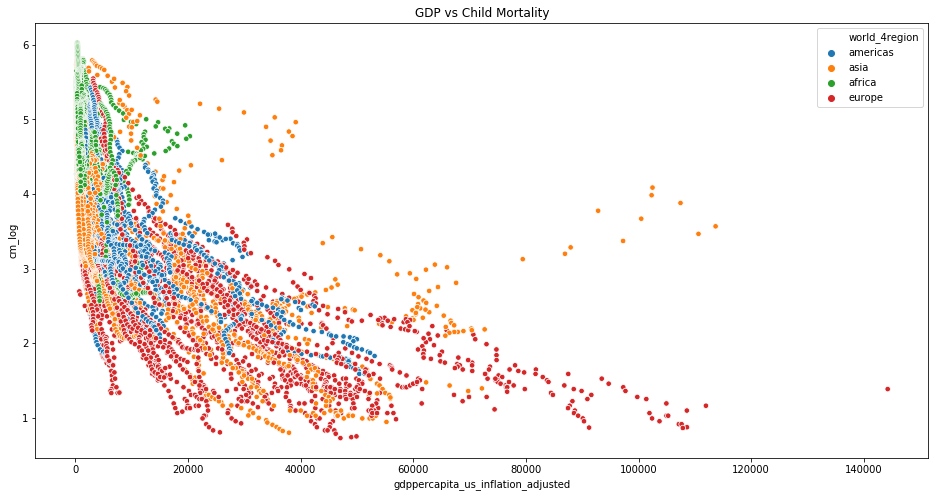

In [18]:
gdp_cm['cm_log'] = [np.log(x) for x in gdp_cm.child_mortality]

fig,ax = plt.subplots()
fig.set_size_inches(16,8)
sns.scatterplot(data= gdp_cm, x = 'gdppercapita_us_inflation_adjusted', y = 'cm_log', hue ='world_4region', s = 30)
plt.title('GDP vs Child Mortality')  

#### We still observe a log relationship.
* Taking log of GDP

Text(0.5, 1.0, 'GDP vs Child Mortality')

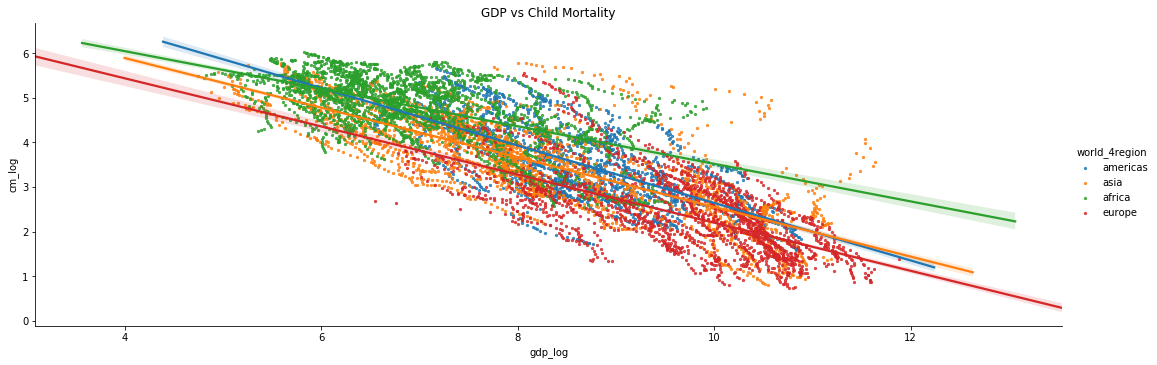

In [19]:
gdp_cm['gdp_log'] = [np.log(x) for x in gdp_cm.gdppercapita_us_inflation_adjusted]

sns.lmplot(data= gdp_cm, x = 'gdp_log', y = 'cm_log', hue ='world_4region', height=5, aspect=3, scatter_kws={"s": 5})
plt.title('GDP vs Child Mortality')  

#### The relationship looks inversely proportional

In [20]:
model = LinearRegression()
model.fit(gdp_cm[['time','gdp_log']],gdp_cm[['cm_log']])
r_sq = model.score(gdp_cm[['time','gdp_log']],gdp_cm[['cm_log']])
r_sq

0.8078389073092022

In [23]:
bias = model.intercept_
coef = model.coef_

In [26]:
pd.DataFrame({'time':coef[0][0],'gdp_log':coef[0][1],'bias':bias},index = ['coefficients'])

,time,gdp_log,bias
coefficients,-0.026455,-0.624748,61.52818


#### For the model with best 𝑅² value we can Quantify the relationship between Life expectancy and GDP as:
#### $$ log(Child \ Mortality) \propto -0.624748*log(GDP)   $$
#### $$ \sim log(Child \ Mortality) \propto 0.624748*log(1/GDP)   $$
* We can say that with increase in GDP (per capita income) the child mortality rate reduces hence they have inverse relationship.

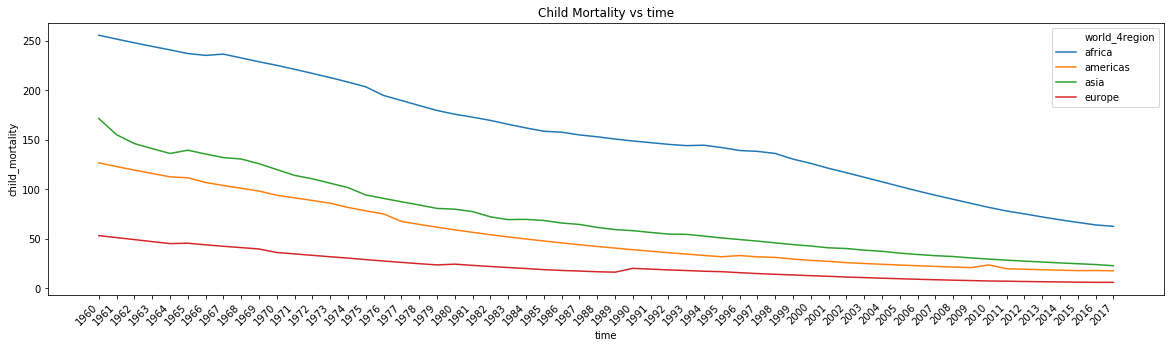

In [32]:
grouped_df = gdp_cm.groupby(['world_4region','time']).mean().reset_index()[['world_4region','time','child_mortality']]

plt.figure(figsize=(20,5))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)
plt.title("Child Mortality vs time")
sns.lineplot(data = grouped_df, x = 'time', y = 'child_mortality', hue = 'world_4region') 

* Child Mortality reduces with time.

#### As the data can be made linear by logarithmic transformations Linear Regression is used the R² value of the model is 0.807 which is good and suggests that the model can establish the linear relationship between  log transformations of child mortality and GDP(per capita income).

#### The assumption of Linear Regression is that all the variables are independent of each other however as the data is time series there is an autocorrelation amongst the time components (i.e. time series is linearly related to a lagged version of itself the previous data can be used to forcast the trend in child mortality, life expectancy or GDP( per capita income )).